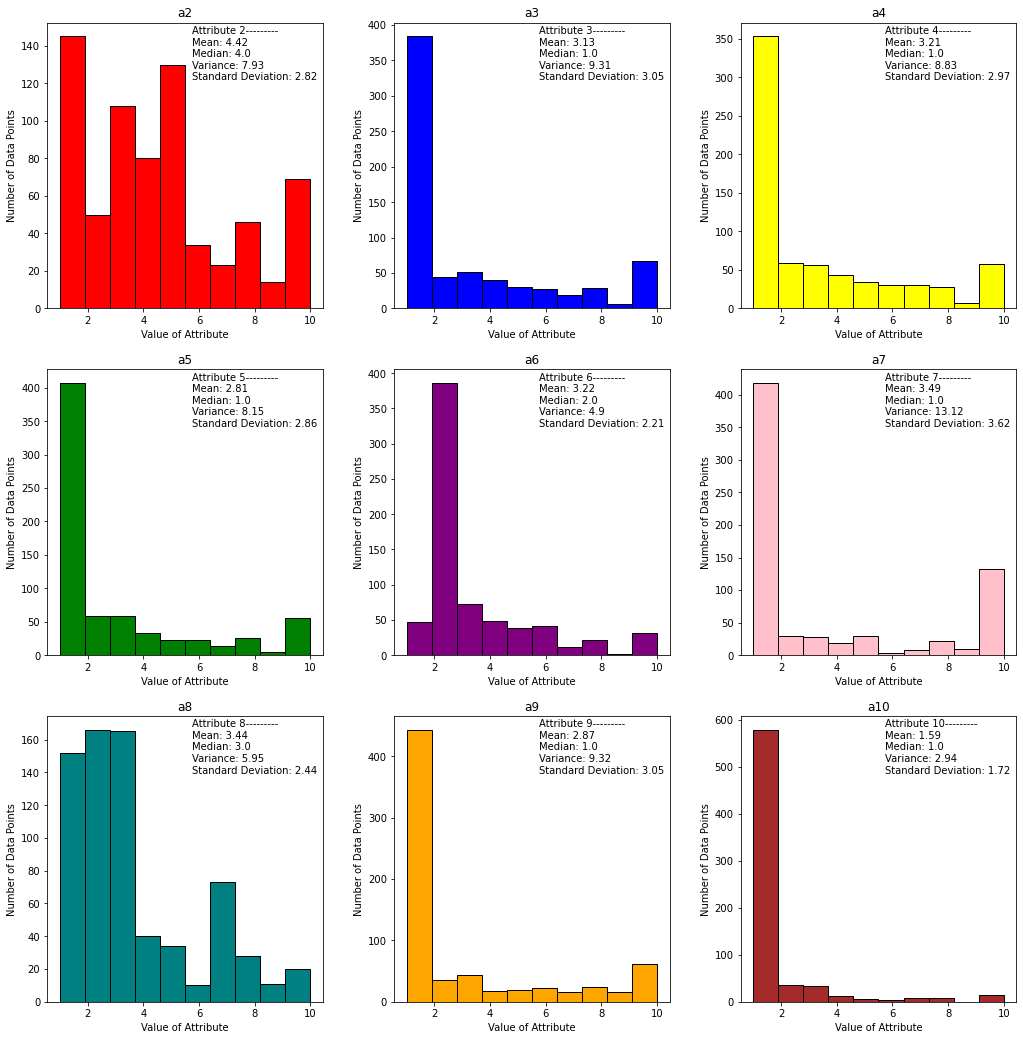

In [87]:
# Final Project Phase 1
# Program takes a dataframe and creates a histogram of each column and prints statistical data about each column
# date: 11/08/2020
# Author: Glenn Haag

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import math


def get_stats(arr):
    #convert data into a series
    ser = pd.Series(arr)
    #calculate the statistical values of interest
    mean = ser.sum()/ser.count()
    var = sum((ser - mean)**2) / (ser.count() - 1)
    stdev = var ** .5
    median = ser.median()
    #return the stats
    return round(mean, 2), round(median, 2), round(var, 2), round(stdev, 2)

def main():
    #read the csv into a dataframe
    df = pd.read_csv('breast_cancer_wisconsin-1.csv', na_values = '?')
    #counter variable used in the for loops
    j = 1
    #variable for number of row and cols in the figure
    rows = 3
    cols = 3
    #holds return value of get_stats
    stats = []
    #library for the column indexes of the df
    columns = {
        1: 'a2',
        2: 'a3',
        3 : 'a4',
        4 : 'a5',
        5: 'a6',
        6: 'a7',
        7: 'a8',
        8: 'a9',
        9: 'a10'
        
    }
    #used to print the histograms in different colors
    colors = {
        1: 'red',
        2: 'blue',
        3: 'yellow',
        4: 'green',
        5: 'purple',
        6: 'pink',
        7: 'teal',
        8: 'orange',
        9: 'brown'
    }
    
    #draw the figure in a 3x3 
    fig, axes = plt.subplots(rows, cols, figsize = (15, 15))
    #padding between each histogram
    fig.tight_layout(pad = 4.0)
    
    #replace all the missing values with the median value of the a7 column
    df['a7'] = df['a7'].fillna(df['a7'].median(axis = 0))
    #print(df)
    
    for x in range(rows):
        for y in range(cols):
            #print each of the histograms and put the lables on
            axes[x][y].hist(df[columns[j]], bins = 10, color = colors[j], edgecolor = 'black')
            axes[x][y].set_xlabel('Value of Attribute')
            axes[x][y].set_ylabel('Number of Data Points')
            axes[x][y].set_title(columns[j])
            
            #get all the statistical values for each column
            stats.append(get_stats(df[columns[j]]))
            
            #get the maximum x and y values of each plot to properly space the stat values in the plots
            ymin, ymax = axes[x][y].get_ylim()
            xmin, xmax = axes[x][y].get_xlim()
            
            #display the stat values in text boxes on the plots
            #use the max x and y vals to space the text boxes appropriately
            axes[x][y].text(xmax* .55, ymax * .8, "Attribute "+str(j+1)+"---------\nMean: "+str(stats[j-1][0])+"\nMedian: "+str(stats[j-1][1])\
                           +"\nVariance: "+str(stats[j-1][2])+"\nStandard Deviation: "+str(stats[j-1][3]))
            
            #increment counter variable
            j += 1
        
    #save the figure to a pdf
    fig.savefig('hists.pdf')
    
main()